Name : Yash Bhanushali                          
Task 1 : Predict the percentage of student based on the no. of study hours using Simple Linear Regression

In [5]:
# Importing all libraries needed
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
data = pd.read_csv('/content/student_scores.csv')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**EDA**

In [9]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [10]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [11]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [13]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [14]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


 Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


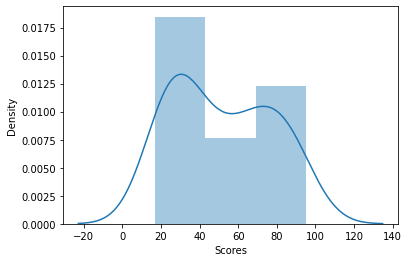

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


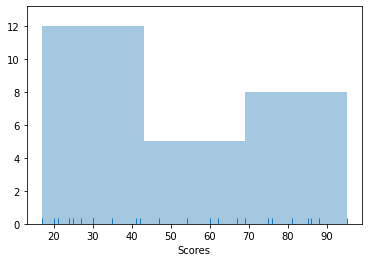

In [7]:
sns.distplot(data["Scores"])
plt.show()

sns.distplot(data["Scores"], kde=False, rug=True)
plt.show()

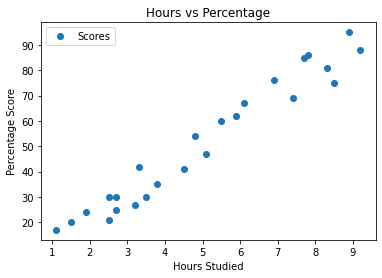

In [20]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [16]:
#Separating X and Y values
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Perform Simple Linear Regression

In [17]:
#Split the data into training and testing data to build the model i.e. 80:20 Ratio
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [18]:
#Build the model
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print(regressor.intercept_)

2.018160041434662


In [24]:
print(regressor.coef_)

[9.91065648]


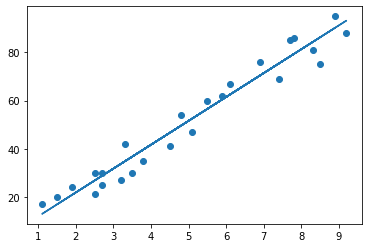

In [25]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Making Predictions

In [26]:
print(X_test) # Testing data-In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [41]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [40]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [49]:
#Evaluating the model
from sklearn import metrics 
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


In [54]:
# You can also test with your own data
hours = np.array([9.25])
hours = hours.reshape(-1,1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


**Additional conclusions: Categorical Predication**

In [61]:
# Consider a threshold to come to a conclusion whether the student passed or not!
# Let's consider here 40 as the cut-off to pass.
cut_off= 40

In [63]:
data['Result'] = data['Scores']>=40

In [64]:
data.head()

,Hours,Scores,Result
0,2.5,21,False
1,5.1,47,True
2,3.2,27,False
3,8.5,75,True
4,3.5,30,False


**Feature Engineering**

In [69]:
feature = data['Hours'].values.reshape(-1, 1)
target = data['Result'].values

In [87]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, random_state=0)

**Training the KNN Model**

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [92]:
#Accuracy
knn.score(X_train, y_train)

0.9444444444444444

In [91]:
#Accuracy
knn.score(X_test, y_test)

0.8571428571428571

**Predicting the outcomes**

In [93]:
get_results = [[9.25]]

In [94]:
knn.predict(get_results)

array([ True])

In [95]:
knn.predict([[14]])

array([ True])

In [96]:
knn.predict([[3]])

array([False])